In [1]:
import autograd.numpy as np
from autograd import grad

import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline

/Users/jacobbrewer/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#Importing Data

In [2]:
# =============================================
#
# load cifar-10-small and project down
#
 
def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( '../[2]Perceptron/cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
N = 1000
D = 1000
 
# only keep N items
features = features[ 0:N, : ] 
labels = labels[ 0:N, : ]
 
# project down into a D-dimensional space
features = np.dot( features, np.random.randn( 3072, D) )
 
# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

delta = .00201
stepSize = 0.1


In [3]:
# MAIN CODE

def score(weights):
    return np.dot(features,weights)

def softmax(weights):
    scores = score(weights)
    numerator = np.exp(scores)
    probs = np.divide(numerator, np.atleast_2d(np.sum(numerator,axis=1)* 1.0 ).T)
    L_is = -np.log(probs[range(len(labels)), labels.T].T)
    return L_is

def getTotalLoss(weights):
    return np.mean(softmax(weights)); 

def testAccuracy(weights):
    predictions = np.atleast_2d(np.argmax(features.dot(weights),axis=1)).T
    return np.mean(predictions==labels)


In [4]:
# Numerical Differentiation

#JITTER TIME
def getGradient(weights):
    gradient = np.zeros((D,10))
    originalLoss = np.mean(softmax(weights))
    #print 'loss ', originalLoss

    for r in range (0,len(weights),1):
        for c in range(0,len(weights[0]),1):
            weights [r][c] += delta # Jitter
            newLoss = np.mean(softmax(weights))
            weights [r][c] -= delta # Return to original value
            gradient[r][c] = (newLoss - originalLoss ) / delta
            #print 'rc ', r, c, ' weight: ', weights [r][c], 'new loss: ', newLoss, originalLoss, gradient[r][c]
    
    #finalLoss = np.mean(softmax())
    
    return gradient 


def epoch(weights):    
    grad_function = grad(getTotalLoss)
    grads = grad_function(weights)
    updatedWeights = weights - stepSize * grads
    return updatedWeights
    
def train(numberOfEpochs):
    weights = np.random.rand(D,10) # initialize Weights
    losses = []
    accuracies = []
    for i in range(0,numberOfEpochs, 1):
        weights = epoch(weights)
        losses.append(np.mean(softmax(weights)))
        accuracies.append(testAccuracy(weights))
    return losses, accuracies


#Gradient Descent Visualization

In [5]:
losses, accuracies= train(2000)

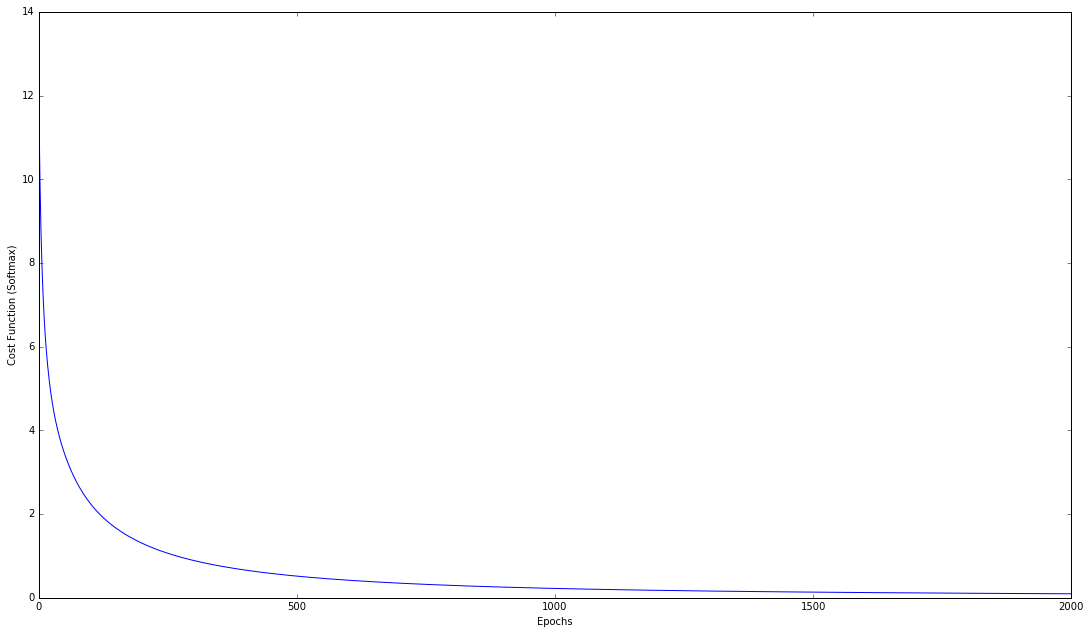

In [6]:
plt.plot(losses)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Epochs')
plt.ylabel('Cost Function (Softmax)')
plt.show()

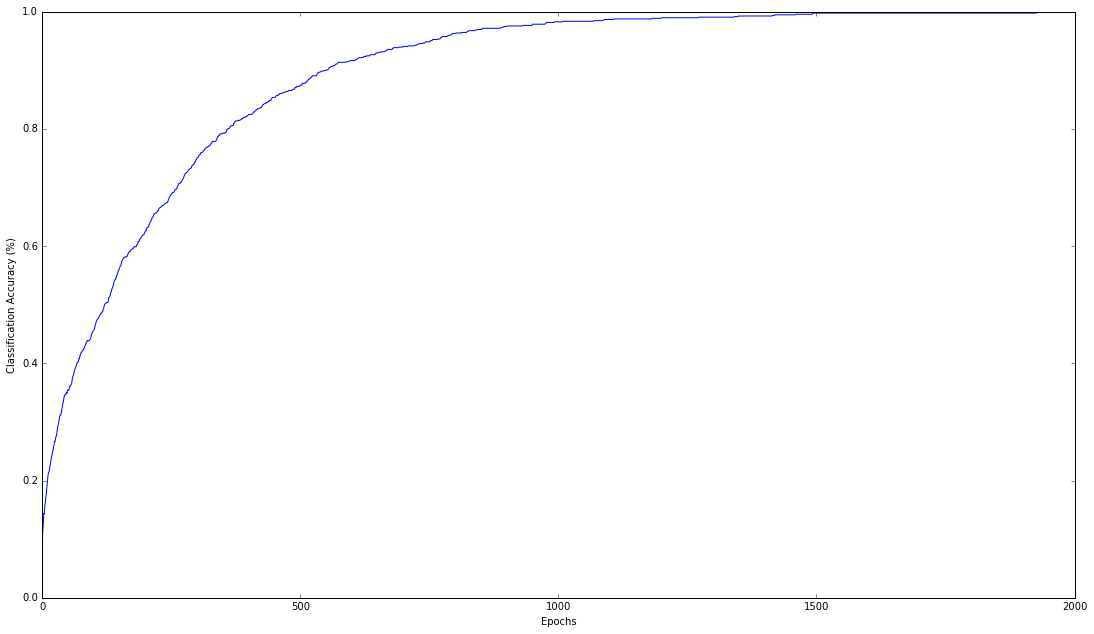

In [7]:
plt.plot(accuracies)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Epochs')
plt.ylabel('Classification Accuracy (%)')
plt.show()